# Hackathon

### imports

In [190]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline              
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Million Tonnes of Oil Equivalent

### Production monde

In [316]:
df = pd.read_csv('TEP.csv', header=2)

def clean_data(df):
    df = df.rename(columns={'2000 - 2018 (%/year) ': 'Evolution'})
    #df.nlargest(10, df['Evolution'])
    df.sort_values(by ='Evolution' , ascending=False)
    df = df.drop_duplicates()
    df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    df=df.set_index('Countries')
    df['Evolution'] = df.Evolution.str[1:].str.replace(',', '.').astype(float)
    df=df[:58]
    df=df.sort_values(by ='Evolution' , ascending=False)
    return df
def clean_data2(df):
    df = df.rename(columns={'2000 - 2018 (points) ': 'Evolution'})
    df.sort_values(by ='Evolution' , ascending=False)
    df = df.drop_duplicates()
    df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    df=df.set_index('Countries')
    df['Evolution'] = df.Evolution.str[1:].str.replace(',', '.').astype(float)
    df=df[:58]
    df=df.sort_values(by ='2018' , ascending=False)
    return df


df_clean = clean_data(df)

In [318]:
df_clean.head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2017 - 2018 (%),Evolution
Countries,,,,,,,,,,,,,,,,,,,,,
Japan,"76,12","80,12","81,15","88,57","91,44","99,52","102,48","106,81","109,37","104,88",...,"53,87","30,88","30,39","28,98","33,66","37,26","42,28","47,68","12,76",4.35
United Kingdom,"207,99","214,74","214,96","223,41","251,80","257,52","268,92","268,25","271,88","281,57",...,"129,87","116,68","109,55","107,93","118,32","120,06","120,16","123,89","3,11",4.28
Venezuela,"144,75","160,41","161,59","170,56","177,78","192,36","217,04","229,06","226,55","206,26",...,"198,93","194,40","191,71","185,72","183,34","168,41","148,83","111,83","-24,86",3.59
Netherlands,"60,60","67,54","67,58","68,89","66,77","66,90","74,78","66,51","63,92","59,86",...,"66,43","66,11","69,77","60,31","47,94","46,08","41,70","31,25","-25,05",3.42
Mexico,"195,18","203,73","203,08","206,32","205,34","203,89","214,12","225,74","225,88","224,54",...,"216,81","218,60","216,72","208,57","189,64","180,44","165,33","158,41","-4,19",2.01
European Union,"955,18","945,11","933,05","936,86","952,84","967,59","999,79","987,91","960,16","960,98",...,"811,60","803,21","797,76","780,24","773,12","760,82","757,88","753,02","-0,64",1.30
Poland,"104,24","99,98","97,52","97,38","97,90","99,51","102,40","100,01","87,35","83,66",...,"68,44","71,75","71,49","67,90","68,52","67,26","65,81","64,05","-2,68",1.20
Ukraine,"126,60","110,78","104,27","94,68","82,62","77,89","70,63","71,25","70,82","71,55",...,"85,61","85,27","86,24","77,27","64,41","66,17","57,98","58,34","0,61",1.17
Taiwan,"10,65","10,70","10,37","10,27","10,53","10,63","11,18","10,99","11,32","11,70",...,"13,56","13,27","13,54","13,64","12,31","10,86","8,43","9,66","14,69",1.10


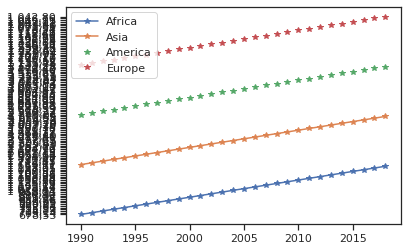

In [349]:
a=np.array(df_clean.loc[['Africa','Asia','America','Europe', 'World']])
n=len(a[0,:-2])
b=[k for k in range(1990,n+1990)]
plt.plot(b,a[0,:-2],'-*',b,a[1,:-2],'-*',b,a[2,:-2],'*',b,a[3,:-2],'*')
plt.legend(['Africa','Asia','America','Europe', 'World'])

In [314]:
ds=df_clean.sort_values(by ='Evolution' , ascending=False)
df2018=ds.loc[:,['2000','2018','Evolution']]
df2018.head()

,2000,2018,Evolution
Countries,,,
Japan,"106,17","47,68",4.35
United Kingdom,"272,46","123,89",4.28
Venezuela,"215,80","111,83",3.59
Netherlands,"58,48","31,25",3.42
Mexico,"228,35","158,41",2.01


## Production d'électricté à partir des énergies renouvelables

In [370]:
renewables = pd.read_csv('renewables.csv', header=2)
renewables = renewables.rename(columns={'2000 - 2018 (points) ': 'Evolution'})

renewables.sort_values(by ='Evolution' , ascending=False)
df = renewables.drop_duplicates()
df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
df=df.set_index('Countries')
df=df[:58]
#df=df.sort_values(by ='2018' , ascending=False) 
df['2018'] = df['2018'].str[1:].str.replace(',', '.').astype(float)

df2018=df.loc[:,['2000','2018','Evolution']]
df3=df2018.head(10)
df3

,2000,2018,Evolution
Countries,,,
World,"18,82",5.60,"6,8"
OECD,"16,19",6.14,"9,9"
G7,"13,59",4.63,"11,0"
BRICS,"23,34",6.74,"3,4"
Europe,"20,13",6.40,"16,3"
European Union,"14,78",2.72,"17,9"
Belgium,"2,72",3.30,"20,6"
Czech Republic,"3,86",1.90,"8,0"
France,"13,74",9.94,"6,2"


In [343]:
total=df3.loc[:,'2018'].values.sum()
df3['Pourcentage']=df3.loc[:,'2018'].values/total*100
df3.head(10)

/home/sonia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,2000,2018,Evolution,Pourcentage
Countries,,,,
Norway,"99,72",7.88,"-1,8",19.432799
New Zealand,"71,50",3.07,"11,6",7.570900
Brazil,"89,49",2.46,"-7,0",6.066584
Ukraine,"6,68",0.81,"2,1",1.997534
Egypt,"17,70",0.21,"-9,5",0.517879
Colombia,"75,52",5.73,"0,2",14.130703
Venezuela,"73,75",0.77,"-3,0",1.898890
Canada,"60,61",5.86,"5,3",14.451295
Latin America,"61,70",8.49,"-3,2",20.937115


In [369]:
data=df3.loc[:,'Pourcentage']
name=data.index
name=list(name)

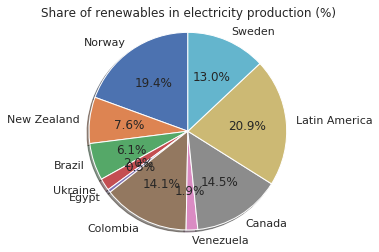

In [372]:
plt.pie(data,labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Share of renewables in electricity production (%)')
plt.show()

## Consommation

In [374]:
df = pd.read_csv('Total_energy_consumption.csv', header=2)

df_clean = clean_data(df)
df_clean=df_clean[:58]
df_clean

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2017 - 2018 (%),Evolution
Countries,,,,,,,,,,,,,,,,,,,,,
World,8763.0,8816.0,8830.0,8922.0,8994.0,9215.0,9448.0,9541.0,9597.0,9790.0,...,13071.0,13278.0,13458.0,13632.0,13675.0,13768.0,14070.0,14391.0,"2,3","2,0"
OECD,4531.0,4581.0,4629.0,4701.0,4790.0,4880.0,5027.0,5074.0,5099.0,5184.0,...,5331.0,5293.0,5332.0,5283.0,5284.0,5293.0,5352.0,5419.0,"1,2","0,1"
G7,3497.0,3530.0,3572.0,3619.0,3685.0,3744.0,3835.0,3852.0,3879.0,3939.0,...,3842.0,3794.0,3842.0,3813.0,3797.0,3765.0,3788.0,3857.0,"1,8","-0,2"
BRICS,2292.0,2275.0,2240.0,2266.0,2238.0,2320.0,2367.0,2364.0,2371.0,2434.0,...,4588.0,4742.0,4836.0,4956.0,4972.0,4984.0,5147.0,5323.0,"3,4","4,3"
Europe,1785.0,1780.0,1741.0,1742.0,1738.0,1781.0,1847.0,1835.0,1849.0,1831.0,...,1867.0,1856.0,1840.0,1779.0,1807.0,1824.0,1857.0,1847.0,"-0,5","0,0"
European Union,1654.0,1653.0,1616.0,1615.0,1615.0,1651.0,1709.0,1690.0,1700.0,1686.0,...,1663.0,1650.0,1631.0,1570.0,1589.0,1598.0,1619.0,1602.0,"-1,0","-0,3"
Belgium,48.0,50.0,51.0,49.0,52.0,53.0,56.0,56.0,57.0,57.0,...,56.0,54.0,56.0,53.0,53.0,56.0,55.0,53.0,"-4,2","-0,5"
Czech Republic,50.0,45.0,44.0,43.0,41.0,42.0,43.0,43.0,42.0,39.0,...,44.0,43.0,43.0,42.0,42.0,42.0,43.0,43.0,"-0,7","0,2"
France,225.0,237.0,234.0,238.0,231.0,240.0,250.0,244.0,251.0,252.0,...,254.0,254.0,255.0,244.0,248.0,244.0,244.0,243.0,"-0,5","-0,3"


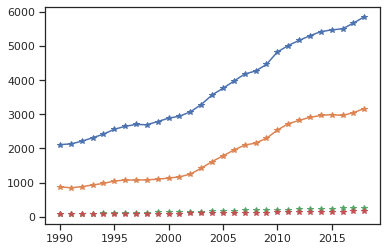

In [375]:
a=np.array(df_clean.loc[['Asia','China','Iran','Nigeria']])
n=len(a[0,:-2])
b=[k for k in range(1990,n+1990)]
plt.plot(b,a[0,:-2],'-*',b,a[1,:-2],'-*',b,a[2,:-2],'*',b,a[3,:-2],'*')

In [377]:
df_clean['Evolution']

Countries
World                    2,0
OECD                     0,1
G7                      -0,2
BRICS                    4,3
Europe                   0,0
European Union          -0,3
Belgium                 -0,5
Czech Republic           0,2
France                  -0,3
Germany                 -0,6
Italy                   -0,6
Netherlands             -0,2
Poland                   1,2
Portugal                -0,5
Romania                 -0,6
Spain                    0,0
Sweden                   0,4
United Kingdom          -1,3
Norway                   0,6
Turkey                   3,7
CIS                      1,0
Kazakhstan               5,1
Russia                   1,4
Ukraine                 -2,1
Uzbekistan              -1,3
America                  0,4
North America            0,1
Canada                   1,0
United States            0,0
Latin America            1,8
Argentina                1,7
Brazil                   2,5
Chile                    2,6
Colombia                 2,3
Mexi

Text(0.5, 1.0, 'Evolution par pays')

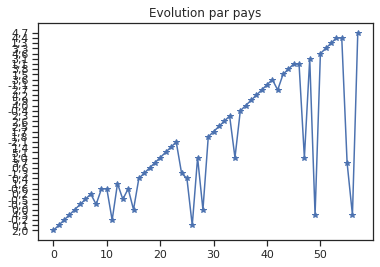

In [381]:
plt.plot(df_clean['Evolution'].values,'-*')
plt.title('Evolution par pays')